<a href="https://colab.research.google.com/github/Vneee/mental-disorder-predictor/blob/main/mental_disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from plotly import express as exp
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from IPython.display import Markdown, display

In [ ]:
df = pd.read_csv("/content/Dataset-Mental-Disorders.csv")

In [ ]:
rows, columns = df.shape
print(f"Dataframe has {rows} rows and {columns} columns.")

Dataframe has 120 rows and 19 columns.


In [ ]:
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [ ]:
df.describe()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Patiant-01,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


# Data Preprocessing

In [ ]:
df = df.drop(["Patient Number"], axis=1)

In [ ]:
df["Sexual Activity"] = df["Sexual Activity"].apply(lambda x: x.replace(" From 10",""))
df["Concentration"] = df["Concentration"].apply(lambda x: x.replace(" From 10",""))
df["Optimisim"] = df["Optimisim"].apply(lambda x: x.replace(" From 10",""))

In [ ]:
df["Sexual Activity"] = df["Sexual Activity"].astype(dtype=int)
df["Concentration"] = df["Concentration"].astype(dtype=int)
df["Optimisim"] = df["Optimisim"].astype(dtype=int)

In [ ]:
df["Suicidal thoughts"] = df["Suicidal thoughts"].apply(lambda x: x.strip())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    object
 1   Euphoric             120 non-null    object
 2   Exhausted            120 non-null    object
 3   Sleep dissorder      120 non-null    object
 4   Mood Swing           120 non-null    object
 5   Suicidal thoughts    120 non-null    object
 6   Anorxia              120 non-null    object
 7   Authority Respect    120 non-null    object
 8   Try-Explanation      120 non-null    object
 9   Aggressive Response  120 non-null    object
 10  Ignore & Move-On     120 non-null    object
 11  Nervous Break-down   120 non-null    object
 12  Admit Mistakes       120 non-null    object
 13  Overthinking         120 non-null    object
 14  Sexual Activity      120 non-null    int64 
 15  Concentration        120 non-null    int64 
 16  Optimisi

In [ ]:
expert_diag_freq = df["Expert Diagnose"].value_counts()

fig = exp.pie(values=expert_diag_freq.values, names= expert_diag_freq.keys(), hole=.3)
fig.show()

In [ ]:
exp.histogram(df, x="Sadness", color="Sleep dissorder", barmode="group")

In [ ]:
exp.histogram(df, x="Sadness", color="Suicidal thoughts", barmode="group")

In [ ]:
exp.histogram(df, x="Sexual Activity", color="Aggressive Response", barmode="group")

In [ ]:
exp.histogram(df, x="Exhausted", color="Overthinking", barmode="group")

In [ ]:
encodings_objs = {}
df_encoded = pd.DataFrame()
for column in df.columns:
    if df[column].dtype != int:
        encodings_objs[column] = LabelEncoder().fit(df[column])
        df_encoded[column] = encodings_objs[column].transform(df[column])
    else:
        df_encoded[column] = df[column]

In [ ]:
columns = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim']
X_train,X_test,Y_train,Y_test = train_test_split(df_encoded[columns], df["Expert Diagnose"], random_state=123, train_size=0.8, shuffle=True, stratify=df["Expert Diagnose"])

In [ ]:
rf = RandomForestClassifier(n_estimators=9,random_state=123,criterion="entropy")

In [ ]:
nb = CategoricalNB()

In [ ]:
vc = VotingClassifier(estimators = [('rf',rf),('nb',nb)],voting="soft")
vc_c = vc.fit(X_train,Y_train)

Accuracy: 100.0%


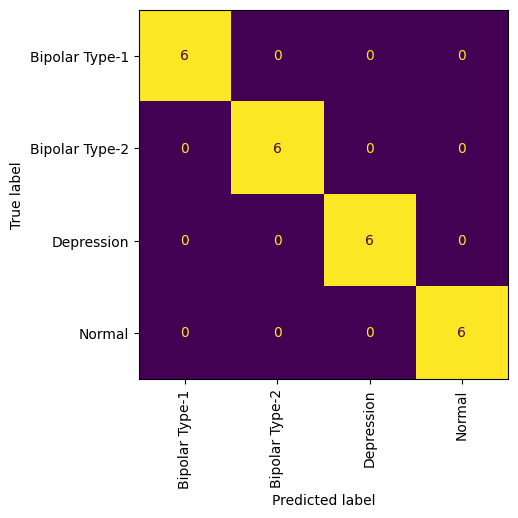

In [ ]:
vc_out = vc_c.predict(X_test)
print(f"Accuracy: {accuracy_score(vc_out,Y_test)*100}%")
cm = confusion_matrix(vc_out,Y_test)
disp = ConfusionMatrixDisplay(cm,display_labels=encodings_objs["Expert Diagnose"].classes_)
disp.plot(colorbar=False,xticks_rotation="vertical")
plt.show()

In [ ]:
display(Markdown("<b>Possible values for prediction:</b>"))
msg = ""
for index,c in enumerate(df.columns[:-1]):
    if df[c].dtype == int:
        msg += f" {index+1}. {c}: *1 to 10*\n"
    else:
        msg += f" {index+1}. {c}: *{', '.join(df[c].unique())}*\n"
display(Markdown(msg))

<b>Possible values for prediction:</b>

 1. Sadness: *Usually, Sometimes, Seldom, Most-Often*
 2. Euphoric: *Seldom, Most-Often, Usually, Sometimes*
 3. Exhausted: *Sometimes, Usually, Seldom, Most-Often*
 4. Sleep dissorder: *Sometimes, Most-Often, Usually, Seldom*
 5. Mood Swing: *YES, NO*
 6. Suicidal thoughts: *YES, NO*
 7. Anorxia: *NO, YES*
 8. Authority Respect: *NO, YES*
 9. Try-Explanation: *YES, NO*
 10. Aggressive Response: *NO, YES*
 11. Ignore & Move-On: *NO, YES*
 12. Nervous Break-down: *YES, NO*
 13. Admit Mistakes: *YES, NO*
 14. Overthinking: *YES, NO*
 15. Sexual Activity: *1 to 10*
 16. Concentration: *1 to 10*
 17. Optimisim: *1 to 10*


In [ ]:
patient = {
    'Sadness': 'Sometimes',
    'Euphoric': 'Usually',
    'Exhausted': 'Usually',
    'Sleep dissorder': 'Seldom',
    'Mood Swing': 'YES',
    'Suicidal thoughts': 'NO',
    'Anorxia': "NO",
    'Authority Respect': 'YES',
    'Try-Explanation': 'NO',
    'Aggressive Response': 'YES',
    'Ignore & Move-On': 'YES',
    'Nervous Break-down': 'NO',
    'Admit Mistakes': 'YES',
    'Overthinking': 'YES',
    'Sexual Activity': 5,
    'Concentration':7,
    'Optimisim': 9,
}

patient_df = pd.DataFrame(patient,index=[0])
patient_df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
0,Sometimes,Usually,Usually,Seldom,YES,NO,NO,YES,NO,YES,YES,NO,YES,YES,5,7,9


In [ ]:
for c in patient_df.columns:
    if patient_df[c].dtype != int:
        patient_df[c] = encodings_objs[c].transform(patient_df[c])

In [ ]:
out = vc_c.predict_proba(patient_df)
exp.pie(values=out[0]*100,names=vc_c.classes_,title=f"Prediction confidence for each class. The patient has <b>{vc_c.classes_[np.argmax(out[0])]}</b> mental disorder.")